## Bucle para importar todas las hojas de excel

In [57]:
import pandas as pd

# Ruta del archivo Excel
ruta_archivo = 'Cabezas_ganado.xlsx'

# Leer todas las hojas en un diccionario 
hojas = pd.ExcelFile(ruta_archivo).sheet_names
dataframes = {}

for hoja in hojas:
    dataframes[hoja] = pd.read_excel(ruta_archivo, sheet_name= hoja)

# Forma de hacerlo con list comprenhension
# dataframes = {f"df_{hoja}": pd.read_excel(ruta_archivo, sheet_name=hoja) for hoja in hojas}

# Vertificar 
for hoja in hojas:
    print(f"Hoja: {hoja}")

Hoja: 2015
Hoja: 2016
Hoja: 2017
Hoja: 2018
Hoja: 2019
Hoja: 2020
Hoja: 2021
Hoja: 2022
Hoja: 2023


## Bucle para guardar cada hoja en un diccionario

In [58]:
# Crear un diccionario para almacenar los dataframes
dataframes_completo = {}

# Limpiar los nombres de los municipios
caracteres_reemplazar = [",", "(", ")", "-"]

for hoja in hojas:
    # Leer el DataFrame 
    df = dataframes[hoja]
    
    # Renombrar la columna MUNICIPIO 
    df.rename(columns={'MUNICIPIO': 'Municipio'}, inplace=True)
    
    # Eliminar caracteres
    for caracter in caracteres_reemplazar:
        df['Municipio'] = df['Municipio'].str.replace(caracter, "", regex=False)
    
    # Guardar el resultado en el diccionario
    dataframes_completo[hoja] = df

# Verificar 
print(dataframes_completo['2015'].head())

  PROVINCIA Municipio ESPECIE CLASIF.ZOOTECNICA  CENSO
0  ALBACETE    ALATOZ  ABEJAS        PRODUCCION  403.0
1  ALBACETE    ALATOZ  ABEJAS        PRODUCCION  510.0
2  ALBACETE    ALATOZ  ABEJAS            MIXTAS   45.0
3  ALBACETE    ALATOZ  ABEJAS        PRODUCCION  350.0
4  ALBACETE  ALBACETE  ABEJAS            MIXTAS   10.0


## Bucle para identificar valores nulos en cada elemento del diccionario

In [59]:
for hoja, df in dataframes_completo.items():
    print(f"\nValores nulos en la hoja {hoja}:")
    for columna in df.columns:
        valores_nulos = df[columna].isnull().sum()
        print(f"   {columna}: {valores_nulos}")


Valores nulos en la hoja 2015:
   PROVINCIA: 0
   Municipio: 0
   ESPECIE: 0
   CLASIF.ZOOTECNICA: 0
   CENSO: 10

Valores nulos en la hoja 2016:
   PROVINCIA: 0
   Municipio: 0
   ESPECIE: 0
   CLASIF.ZOOTECNICA: 0
   CENSO: 1

Valores nulos en la hoja 2017:
   PROVINCIA: 0
   Municipio: 0
   ESPECIE: 0
   CLASIF.ZOOTECNICA: 0
   CENSO: 1

Valores nulos en la hoja 2018:
   PROVINCIA: 0
   Municipio: 0
   ESPECIE: 0
   CLASIF.ZOOTECNICA: 0
   CENSO: 1

Valores nulos en la hoja 2019:
   PROVINCIA: 0
   Municipio: 0
   ESPECIE: 0
   CLASIF.ZOOTECNICA: 0
   CENSO: 5

Valores nulos en la hoja 2020:
   PROVINCIA: 0
   Municipio: 0
   ESPECIE: 0
   CLASIF.ZOOTECNICA: 0
   CENSO: 3

Valores nulos en la hoja 2021:
   PROVINCIA: 0
   Municipio: 0
   ESPECIE: 0
   CLASIF.ZOOTECNICA: 0
   CENSO: 4

Valores nulos en la hoja 2022:
   PROVINCIA: 0
   Municipio: 0
   ESPECIE: 0
   CLASIF.ZOOTECNICA: 0
   CENSO: 3

Valores nulos en la hoja 2023:
   PROVINCIA: 0
   Municipio: 0
   ESPECIE: 0
   CLASIF

## Bucle para identificar valores nulos en mi coluna CENSO

In [60]:
for hoja, df in dataframes_completo.items():
    #Comprobamos que existe la columna CENSO
    if 'CENSO' in df.columns:  
        #Filtrar las filas con valores NaN
        filas_nulas = df[df['CENSO'].isnull()]  
        if not filas_nulas.empty:
            print(f"\nFilas con valores nulos en la columna 'CENSO' del año {hoja}:")
            print(filas_nulas)
        else:
            print(f"\nNo hay valores nulos en la columna 'CENSO' del año {hoja}.")
    else:
        print(f"\nLa columna 'CENSO' no existe en el año {hoja}.")


Filas con valores nulos en la columna 'CENSO' del año 2015:
         PROVINCIA             Municipio   ESPECIE CLASIF.ZOOTECNICA  CENSO
5589   CIUDAD REAL               ALMAGRO  GALLINAS             OTROS    NaN
5714        CUENCA          SAN CLEMENTE  GALLINAS             OTROS    NaN
5953        TOLEDO  TALAVERA DE LA REINA  GALLINAS             OTROS    NaN
5954        TOLEDO  TALAVERA DE LA REINA  GALLINAS             OTROS    NaN
5958        TOLEDO  TALAVERA DE LA REINA  GALLINAS             OTROS    NaN
5965        TOLEDO                 UGENA  GALLINAS             OTROS    NaN
10865       CUENCA       MOTA DEL CUERVO     PAVOS             OTROS    NaN
10871       TOLEDO  TALAVERA DE LA REINA     PAVOS             OTROS    NaN
10872       TOLEDO  TALAVERA DE LA REINA     PAVOS             OTROS    NaN
10873       TOLEDO                 UGENA     PAVOS             OTROS    NaN

Filas con valores nulos en la columna 'CENSO' del año 2016:
        PROVINCIA Municipio   ESPECIE CLAS

## Bucle para eliminar los NaN de mi columna CENSO

In [61]:
for hoja, df in dataframes_completo.items():
    #Comprobamos que existe la columna CENSO
    if 'CENSO' in df.columns: 
        # Eliminar los NaN de Censo
        df = df.dropna(subset=['CENSO'])  
        # Guardar el resulatado
        dataframes_completo[hoja] = df 
        print(f"\n NaN eliminados {hoja}.")
    else:
        print(f"\nLa columna 'CENSO' no existe en la hoja {hoja}.")


 NaN eliminados 2015.

 NaN eliminados 2016.

 NaN eliminados 2017.

 NaN eliminados 2018.

 NaN eliminados 2019.

 NaN eliminados 2020.

 NaN eliminados 2021.

 NaN eliminados 2022.

 NaN eliminados 2023.


## Bucle para identificar valores nulos en cada elemento

In [62]:
for hoja, df in dataframes_completo.items():
    # Comprobar si existe la columna CENSO
    if 'CENSO' in df.columns:  
        # Contar los 0
        valores_cero = (df['CENSO'] == 0 ).sum()  
        print(f"\nValores 0 en  'CENSO' de la hoja {hoja}: {valores_cero}")
    else:
        print(f"\nValores 0 en 'CENSO' no existe en la hoja {hoja}.")


Valores 0 en  'CENSO' de la hoja 2015: 1053

Valores 0 en  'CENSO' de la hoja 2016: 1243

Valores 0 en  'CENSO' de la hoja 2017: 1269

Valores 0 en  'CENSO' de la hoja 2018: 1308

Valores 0 en  'CENSO' de la hoja 2019: 1490

Valores 0 en  'CENSO' de la hoja 2020: 1650

Valores 0 en  'CENSO' de la hoja 2021: 1846

Valores 0 en  'CENSO' de la hoja 2022: 2445

Valores 0 en  'CENSO' de la hoja 2023: 2189


In [63]:
for hoja, df in dataframes_completo.items():
    # Comprobar si existe la columna CENSO
    if 'CENSO' in df.columns:  
        #Eliminar valores 0
        df = df[df['CENSO'] != 0]  
        #Guardar el dataframe
        dataframes_completo[hoja] = df  
        print(f" Año {hoja} filas eliminado con 0.")
    else:
        print(f"La columna 'CENSO' no existe en la hoja {hoja}.")

 Año 2015 filas eliminado con 0.
 Año 2016 filas eliminado con 0.
 Año 2017 filas eliminado con 0.
 Año 2018 filas eliminado con 0.
 Año 2019 filas eliminado con 0.
 Año 2020 filas eliminado con 0.
 Año 2021 filas eliminado con 0.
 Año 2022 filas eliminado con 0.
 Año 2023 filas eliminado con 0.


## Función para categorizas y agrupar variables

In [64]:
def categorize_group(dataframes_completo):
    """
    Función para categorizar especies y clasificaciones zootécnicas y agrupar el censo por categoría.

    """
    # Crear una nueva columna CATEGORIA
    dataframes_completo['CATEGORIA'] = None

    # Categorías por BOVINO
    vacuno_carne = [
        'BOVINO CEBADERO', 'BOVINO REPRODUCCIÓN MIXTA','BOVINO REPRODUCCION PARA CARNE', 
        'CEBADERO DE CICLO ABIERTO', 'CEBADERO DE CICLO CERRADO', 
        'EXPLOTACION DE CABESTROS', 'MATADERO'
    ]
    dataframes_completo.loc[(dataframes_completo['ESPECIE'] == 'BOVINO') & (dataframes_completo['CLASIF.ZOOTECNICA'].isin(vacuno_carne)), 'CATEGORIA'] = 'Vacuno de Carne'
    dataframes_completo.loc[(dataframes_completo['ESPECIE'] == 'BOVINO') & (dataframes_completo['CLASIF.ZOOTECNICA'] == 'BOVINO REPRODUCCIÓN PARA LECHE'), 'CATEGORIA'] = 'Vacuno de Leche'

    # Categoría para EQUINO
    dataframes_completo.loc[dataframes_completo['ESPECIE'] == 'EQUINO', 'CATEGORIA'] = 'Caballos, mulas y asnos'

    # Categoría para OVINO
    dataframes_completo.loc[dataframes_completo['ESPECIE'] == 'OVINO', 'CATEGORIA'] = 'Ovino'
    
    # Categoría para OVINO
    dataframes_completo.loc[dataframes_completo['ESPECIE'] == 'CAPRINO', 'CATEGORIA'] = 'Caprino'

    # Categorías para AVES
    dataframes_completo.loc[dataframes_completo['ESPECIE'] == 'GALLINAS', 'CATEGORIA'] = 'Ponedoras y pollos'
    dataframes_completo.loc[dataframes_completo['ESPECIE'] == 'PAVOS', 'CATEGORIA'] = 'Pavos'
    
    # Categoría para PORCINO
    dataframes_completo.loc[dataframes_completo['ESPECIE'] == 'PORCINO', 'CATEGORIA'] = 'Porcino'

    # Agrupar por CATEGORIA y sumar el CENSO
    resumen = dataframes_completo.groupby(['Municipio', 'ESPECIE', 'CATEGORIA'])['CENSO'].sum().reset_index()

    return resumen



## Bucle para guardar cada elemento en un dataframe

In [65]:
for hoja, df in dataframes_completo.items():
    globals()[f"df_{hoja}"] = categorize_group(df)

# Verificar
print(df_2015.sort_values(by='CENSO', ascending=False))

                  Municipio   ESPECIE                CATEGORIA      CENSO
1737                PANTOJA  GALLINAS       Ponedoras y pollos  9935188.0
699               CAZALEGAS  GALLINAS       Ponedoras y pollos  9469847.0
662             CASASIBAÑEZ  GALLINAS       Ponedoras y pollos  7869373.0
2681  VILLASECA DE LA SAGRA  GALLINAS       Ponedoras y pollos  6172386.0
1957      QUINTANAR DEL REY  GALLINAS       Ponedoras y pollos  3188435.0
...                     ...       ...                      ...        ...
391                BELMONTE   PORCINO                  Porcino        1.0
2250                TAMAJON    EQUINO  Caballos, mulas y asnos        1.0
56    ALBALADEJO DEL CUENDE    EQUINO  Caballos, mulas y asnos        1.0
2778   ZARZUELA DE JADRAQUE    EQUINO  Caballos, mulas y asnos        1.0
2677   VILLAS DE LA VENTOSA    EQUINO  Caballos, mulas y asnos        1.0

[2780 rows x 4 columns]


## Importar un nuevo dataframe para identificar por Id

In [66]:
df2 = pd.read_excel('Municipios_mayus.xlsx', dtype={'Id': str, "Municipio": str}, sheet_name='Localidades')

for i in caracteres_reemplazar:
    df2['Municipio'] = df2['Municipio'].str.replace(i ,"", regex = False)

## Bucle de unión de Id para todos los dataframes

In [ ]:
# Agrupar dataframes en una lista
nombres_dataframes = [f"df_{year}" for year in range(2015, 2024)]

# Bucle para unir df2 con nombres_dataframes
for nombre in nombres_dataframes:
    # Comprobamos si existe el df en el entorno 
    if nombre in globals():  
        df_resumen = globals()[nombre]
        # Realizar la unión con how='left'
        df_merged = df_resumen.merge(df2, on='Municipio', how='left')
        # Guardar el resultado
        globals()[nombre] = df_merged

# Verificar 
print(df_2015.head())

   Municipio   ESPECIE                CATEGORIA     CENSO     Id
0  ABENGIBRE   CAPRINO                  Caprino      42.0  02001
1  ABENGIBRE    EQUINO  Caballos, mulas y asnos       3.0  02001
2  ABENGIBRE  GALLINAS       Ponedoras y pollos  150592.0  02001
3  ABENGIBRE     OVINO                    Ovino     509.0  02001
4  ABENGIBRE   PORCINO                  Porcino    5684.0  02001


##  Identificar valores faltantes de los Id

In [68]:
nombres_dataframes = [f"df_{year}" for year in range(2015, 2024)]

for nombre in nombres_dataframes:
    if nombre in globals():  
        df = globals()[nombre]
        # Contar valores NaN en la columna 'Id'
        valores_vacios = df['Id'].isnull().sum()
        print(f'Valores vacíos en Id para {nombre}: {valores_vacios}')
        
        # Listar los municipios únicos con valores NaN en Id
        municipios_unicos = df[df['Id'].isnull()]['Municipio'].unique()
        print(f"Municipios con valores faltantes en ID para {nombre}: {municipios_unicos}")

Valores vacíos en Id para df_2015: 9
Municipios con valores faltantes en ID para df_2015: ['CASAS LAS' 'CASAS NUEVAS' 'CASILLAS DE RANERA' 'HUERTOS LOS'
 'MARDOS LOS' 'TUS' 'USANOS']
Valores vacíos en Id para df_2016: 10
Municipios con valores faltantes en ID para df_2016: ['CASAS DE ROLDAN' 'CASAS LAS' 'CASAS NUEVAS' 'CASILLAS DE RANERA'
 'HUERTOS LOS' 'MARDOS LOS' 'TUS' 'USANOS']
Valores vacíos en Id para df_2017: 12
Municipios con valores faltantes en ID para df_2017: ['CASAS DE ROLDAN' 'CASAS DEL RIO LAS' 'CASAS LAS' 'CASAS NUEVAS'
 'CASILLAS DE RANERA' 'HUERTOS LOS' 'MARDOS LOS' 'TUS' 'USANOS']
Valores vacíos en Id para df_2018: 13
Municipios con valores faltantes en ID para df_2018: ['CASAS DE ROLDAN' 'CASAS DEL RIO LAS' 'CASAS LAS' 'CASAS NUEVAS'
 'CASILLAS DE RANERA' 'CILLAS' 'HUERTOS LOS' 'MARDOS LOS' 'TUS' 'USANOS']
Valores vacíos en Id para df_2019: 13
Municipios con valores faltantes en ID para df_2019: ['CASAS DE ROLDAN' 'CASAS DEL RIO LAS' 'CASAS LAS' 'CASAS NUEVAS'
 'CAS

## Bucle para eliminar Id faltantes de los df

In [ ]:
nombres_dataframes = [f"df_{year}" for year in range(2015, 2024)]

for nombre in nombres_dataframes:
    # Comprobar si existe en el entorno
    if nombre in globals():
        df = globals()[nombre]
        # Eliminar las filas con valores NaN en la columna Id
        df = df.dropna(subset=['Id'])
        # Guardar el resultado
        globals()[nombre] = df
        # Verificar
        print(f"Valores nulos en '{nombre}['Id']': {df['Id'].isnull().sum()}")

Valores nulos en 'df_2015['Id']': 0
Valores nulos en 'df_2016['Id']': 0
Valores nulos en 'df_2017['Id']': 0
Valores nulos en 'df_2018['Id']': 0
Valores nulos en 'df_2019['Id']': 0
Valores nulos en 'df_2020['Id']': 0
Valores nulos en 'df_2021['Id']': 0
Valores nulos en 'df_2022['Id']': 0
Valores nulos en 'df_2023['Id']': 0


## Bucle para agrupar por Id acorde a su Categoria y Especie

In [70]:
nombres_dataframes = [f"df_{year}" for year in range(2015, 2024)]

for nombre in nombres_dataframes:
    # Comprobamos si existe en el df orinial
    if nombre in globals(): 
        df = globals()[nombre]
        
        # Agrupar por Id, CATEGORIA y ESPECIE y sumar los valores
        df_agrupado = df.groupby(['Id', 'CATEGORIA', 'ESPECIE'], as_index=False).sum()   
        # Guardar el resultado
        globals()[nombre] = df_agrupado
        
        # Verificar 
        print(f"DataFrame agrupado: {nombre}")
        print(df_agrupado.head())

DataFrame agrupado: df_2015
        Id                CATEGORIA  ESPECIE Municipio    CENSO
0   02003   Caballos, mulas y asnos   EQUINO  ALBACETE    625.0
1   02003                   Caprino  CAPRINO  ALBACETE   2741.0
2   02003                     Ovino    OVINO  ALBACETE  65537.0
3   02003                   Porcino  PORCINO  ALBACETE  23410.0
4   02003           Vacuno de Carne   BOVINO  ALBACETE     16.0
DataFrame agrupado: df_2016
        Id                CATEGORIA   ESPECIE Municipio    CENSO
0   02003   Caballos, mulas y asnos    EQUINO  ALBACETE    702.0
1   02003                   Caprino   CAPRINO  ALBACETE   2489.0
2   02003                     Ovino     OVINO  ALBACETE  63112.0
3   02003        Ponedoras y pollos  GALLINAS  ALBACETE     95.0
4   02003                   Porcino   PORCINO  ALBACETE  28528.0
DataFrame agrupado: df_2017
        Id                CATEGORIA   ESPECIE Municipio    CENSO
0   02003   Caballos, mulas y asnos    EQUINO  ALBACETE    671.0
1   02003   

## Bucle para crear indicador ambiental de emisiones de CH4 y NO2

In [71]:
# Factores de emisión por categoría
factor_emision = {
    'Vacuno de Carne': 62.0,
    'Vacuno de Leche': 124.8,
    'Ovino': 7.6,
    'Porcino': 0.9,
    'Caprino': 9.2,
    'Caballos, mulas y asnos': 11.7,
    'Ponedoras y pollos': 0.0,  # Bajo la normativa 0 para aves
    'Pavos': 0.0                # Bajo la normativa 0 para aves
}

VS = {
    'Vacuno de Leche': 5.18,
    'Vacuno de Carne': 2.93,
    'Ovino': 0.38,
    'Porcino': 0.34,
    'Caprino': 0.37,
    'Caballos, mulas y asnos': 2.63,
    'Ponedoras y pollos': 0.02,
    'Pavos': 0.07
}

BO = {
    'Vacuno de Leche': 0.24,
    'Vacuno de Carne': 0.18,
    'Ovino': 0.19,
    'Porcino': 0.45,
    'Caprino': 0.18,
    'Caballos, mulas y asnos': 0.35,
    'Ponedoras y pollos': 0.37,
    'Pavos': 0.36
}

Excrecion_N = {
    'Vacuno de Leche': 113.32,
    'Vacuno de Carne': 52.17,
    'Ovino': 5.34,
    'Porcino': 10.65,
    'Caprino': 9.30,
    'Caballos, mulas y asnos': 42.47,
    'Ponedoras y pollos': 0.63,
    'Pavos': 1.63
}

# Bucle para calcular todos los indicadores
for nombre in nombres_dataframes:
    if nombre in globals():
        df = globals()[nombre]
        
        # Calcular la emisión por fermentación entérica
        df['Fermentacion_enterica'] = df['CENSO'] * df['CATEGORIA'].map(factor_emision) * 10**-3
        
        # Calcular la emisión por gestión de estiércol
        df['Gestion_estiercol'] = df['CENSO'] * (df['CATEGORIA'].map(VS) * 365) * (df['CATEGORIA'].map(BO) * 0.67) * 10**-3
        
        # Calcular las emisiones de NO2 por gestión de estiércol
        df['NO2_Solido'] = df['CENSO'] * df['CATEGORIA'].map(Excrecion_N) * 0.005116 * (44/28) * 10**-3
        df['NO2_Liquido'] = df['CENSO'] * df['CATEGORIA'].map(Excrecion_N) * 0.001559 * (44/28) * 10**-3
        df['NO2_Diaria'] = df['CENSO'] * df['CATEGORIA'].map(Excrecion_N) * 0.000075 * (44/28) * 10**-3
        
        # Guardar el resultado
        globals()[nombre] = df
        
        # Verificar
        print(f"DataFrame actualizado: {nombre}")
        print(df[['Id', 'ESPECIE', 'CATEGORIA', 'CENSO', 'Fermentacion_enterica', 'Gestion_estiercol', 'NO2_Solido', 'NO2_Liquido', 'NO2_Diaria']].head())

DataFrame actualizado: df_2015
        Id  ESPECIE                CATEGORIA    CENSO  Fermentacion_enterica  \
0   02003    EQUINO  Caballos, mulas y asnos    625.0                 7.3125   
1   02003   CAPRINO                  Caprino   2741.0                25.2172   
2   02003     OVINO                    Ovino  65537.0               498.0812   
3   02003   PORCINO                  Porcino  23410.0                21.0690   
4   02003    BOVINO          Vacuno de Carne     16.0                 0.9920   

   Gestion_estiercol  NO2_Solido  NO2_Liquido  NO2_Diaria  
0         140.692672    0.213397     0.065028    0.003128  
1          44.642749    0.204935     0.062450    0.003004  
2        1157.154696    2.813539     0.857371    0.041246  
3         875.912072    2.004362     0.610790    0.029384  
4           2.063611    0.006711     0.002045    0.000098  
DataFrame actualizado: df_2016
        Id   ESPECIE                CATEGORIA    CENSO  Fermentacion_enterica  \
0   02003     EQ

## Función para determinar valores nulos en el dataaset con las emisiones

In [73]:
def verificar_valores_nulos(df):
    # eliminar los NaN
    filas_nulas = df[df.isnull().any(axis=1)]
    
    # Mostrar resultados
    if not filas_nulas.empty:
        print("Filas con NaN:")
        print(filas_nulas)
    else:
        print("No hay NaN.")

# Lista de nombres de todos los dataframes
nombres_dataframes = [f"df_{year}" for year in range(2015, 2024)]

# Bucle para aplicar la función a cada dataframe
for nombre in nombres_dataframes:
    if nombre in globals(): 
        print(f"\n ¿Existe valores nulos en {nombre}?")
        verificar_valores_nulos(globals()[nombre])


 ¿Existe valores nulos en df_2015?
No hay NaN.

 ¿Existe valores nulos en df_2016?
No hay NaN.

 ¿Existe valores nulos en df_2017?
No hay NaN.

 ¿Existe valores nulos en df_2018?
No hay NaN.

 ¿Existe valores nulos en df_2019?
No hay NaN.

 ¿Existe valores nulos en df_2020?
No hay NaN.

 ¿Existe valores nulos en df_2021?
No hay NaN.

 ¿Existe valores nulos en df_2022?
No hay NaN.

 ¿Existe valores nulos en df_2023?
No hay NaN.


## Subir dataframe para unir por grupo de ruralidad

In [74]:
import pandas as pd
grupo = pd.read_excel('Grupo.xlsx', dtype={'Id': str})
print(len(grupo))  
print(grupo.head()) 

919
      Id  Grupo
0  02001      2
1  02002      2
2  02003      7
3  02004      2
4  02005      2


## Unir la columna Grupo con los otro dataframe por Id

In [75]:
grupo['Id'] = grupo['Id'].astype(str).str.strip()

for nombre in nombres_dataframes:
    if nombre in globals():
        df = globals()[nombre]
        
        # En la columna Id eliminar espacios en blanco, convertir a string idem
        df['Id'] = df['Id'].astype(str).str.strip()
        
        #Unir tablas por Id
        df_merged = df.merge(grupo, on = 'Id', how = 'left')
        
        # Guardar el resultado e
        globals()[nombre] = df_merged
        
        # Verificar 
        print(f"DataFrame actualizado: {nombre}")
        print(df_merged.head())

DataFrame actualizado: df_2015
      Id                CATEGORIA  ESPECIE Municipio    CENSO  \
0  02003  Caballos, mulas y asnos   EQUINO  ALBACETE    625.0   
1  02003                  Caprino  CAPRINO  ALBACETE   2741.0   
2  02003                    Ovino    OVINO  ALBACETE  65537.0   
3  02003                  Porcino  PORCINO  ALBACETE  23410.0   
4  02003          Vacuno de Carne   BOVINO  ALBACETE     16.0   

   Fermentacion_enterica  Gestion_estiercol  NO2_Solido  NO2_Liquido  \
0                 7.3125         140.692672    0.213397     0.065028   
1                25.2172          44.642749    0.204935     0.062450   
2               498.0812        1157.154696    2.813539     0.857371   
3                21.0690         875.912072    2.004362     0.610790   
4                 0.9920           2.063611    0.006711     0.002045   

   NO2_Diaria  Grupo  
0    0.003128      7  
1    0.003004      7  
2    0.041246      7  
3    0.029384      7  
4    0.000098      7  
DataFra

## Crear panel de datos con todos los df

In [76]:
# Crear una lista para el panel de datos
panel_year = []

# Bucle para procesar todos los dataframes y añadir la columna Year
for year in range(2015, 2024):
    nombre = f"df_{year}"
    # Comprobar si existe en el entorno
    if nombre in globals():  
        df = globals()[nombre]
        # Añadimos la columna Year
        df['Year'] = year  
        panel_year.append(df[['Id', 'ESPECIE', 'CATEGORIA', 'CENSO', 
                              'Fermentacion_enterica', 'Gestion_estiercol', 
                              'NO2_Solido', 'NO2_Liquido', 'NO2_Diaria', 'Grupo', 'Year']])

# Unir todos los df en uno solo
panel_datos = pd.concat(panel_year, ignore_index=True)

# Verificar
print(panel_datos.head())

# Guardar el panel de datos en un archivo .xlsx
panel_datos.to_excel('panel_ganaderia.xlsx', index=False)


      Id  ESPECIE                CATEGORIA    CENSO  Fermentacion_enterica  \
0  02003   EQUINO  Caballos, mulas y asnos    625.0                 7.3125   
1  02003  CAPRINO                  Caprino   2741.0                25.2172   
2  02003    OVINO                    Ovino  65537.0               498.0812   
3  02003  PORCINO                  Porcino  23410.0                21.0690   
4  02003   BOVINO          Vacuno de Carne     16.0                 0.9920   

   Gestion_estiercol  NO2_Solido  NO2_Liquido  NO2_Diaria  Grupo  Year  
0         140.692672    0.213397     0.065028    0.003128      7  2015  
1          44.642749    0.204935     0.062450    0.003004      7  2015  
2        1157.154696    2.813539     0.857371    0.041246      7  2015  
3         875.912072    2.004362     0.610790    0.029384      7  2015  
4           2.063611    0.006711     0.002045    0.000098      7  2015  


## Guardar panel de datos

In [1]:
import pandas as pd
df = pd.read_excel('panel_ganaderia.xlsx', dtype={'Id': str})

## Asignar los grupos por Municipios rurales, agrícolas y periurbanos

In [2]:
# Agrupar municipios rurales, intermedios agrícolas y periurbanos
# Crear una nueva columna 
df['Grupo_clasificado'] = 'Vacío'  
df.loc[df['Grupo'].isin([1, 2, 3]), 'Grupo_clasificado'] = 'Municipios_rurales'
df.loc[df['Grupo'].isin([4, 5]), 'Grupo_clasificado'] = 'Intermedios_agricolas'
df.loc[df['Grupo'].isin([6, 7]), 'Grupo_clasificado'] = 'Periurbanos'

## Bucle para observar los valores agregados por categoría de municipio

In [3]:
# Filtrar los grupos de municipios 
grupos_relevantes = ['Municipios_rurales', 'Intermedios_agricolas', 'Periurbanos']

for grupo in grupos_relevantes:
    # Filtrar el dataframe por el grupo actual
    df_grupo = df[df['Grupo_clasificado'] == grupo]
    
    # Excluir tres categorías
    Excluir = ['GALLINAS', 'PAVOS', 'EQUINO']
    df_grupo = df_grupo[~df_grupo['ESPECIE'].isin(Excluir)]
    
    # Agrupar por ESPECIE y calcular estadísticas descriptivas
    total_por_especie = df_grupo.groupby('ESPECIE')['CENSO'].sum().reset_index()
    total_por_especie.rename(columns={'CENSO': 'Total_Cabezas'}, inplace=True)
    
    # Calcular el total de cabezas de ganado para el grupo actual
    total_censo = total_por_especie['Total_Cabezas'].sum()
    total_por_especie['% Representación'] = (total_por_especie['Total_Cabezas'] / total_censo) * 100
    
    # Verificar
    print(f"\nNúmero total de cabezas de ganado por Especie de los {grupo} ")
    print(total_por_especie.sort_values(by='Total_Cabezas', ascending=False))


Número total de cabezas de ganado por Especie de los Municipios_rurales 
   ESPECIE  Total_Cabezas  % Representación
2    OVINO       15012798         56.662040
3  PORCINO        8026028         30.292230
1  CAPRINO        2248931          8.488026
0   BOVINO        1207579          4.557704

Número total de cabezas de ganado por Especie de los Intermedios_agricolas 
   ESPECIE  Total_Cabezas  % Representación
3  PORCINO       16108053         60.964119
0   BOVINO        5250959         19.873295
2    OVINO        4420279         16.729422
1  CAPRINO         642895          2.433164

Número total de cabezas de ganado por Especie de los Periurbanos 
   ESPECIE  Total_Cabezas  % Representación
3  PORCINO        2207455         39.829230
2    OVINO        1724640         31.117773
0   BOVINO        1423468         25.683710
1  CAPRINO         186736          3.369288


In [4]:
import pandas as pd

# Grupos relevantes
grupos_relevantes = ['Municipios_rurales', 'Intermedios_agricolas', 'Periurbanos']
especies_excluir = ['GALLINAS', 'PAVOS', 'EQUINO']

# Lista para almacenar resultados
totales_por_grupo = []

for grupo in grupos_relevantes:
    df_grupo = df[df['Grupo_clasificado'] == grupo]
    df_grupo = df_grupo[~df_grupo['ESPECIE'].isin(especies_excluir)]
    
    total_grupo = df_grupo['CENSO'].sum()
    
    totales_por_grupo.append({
        'Grupo_clasificado': grupo,
        'Total_CENSO': total_grupo
    })

# Crear DataFrame con totales por grupo
df_totales = pd.DataFrame(totales_por_grupo)

# Calcular total global y porcentajes
total_global = df_totales['Total_CENSO'].sum()
df_totales['%_Grupo_del_total'] = (df_totales['Total_CENSO'] / total_global) * 100

# Mostrar resultado
print("\nResumen total por grupo y su representación porcentual sobre el total conjunto:")
print(df_totales.sort_values(by='Total_CENSO', ascending=False))



Resumen total por grupo y su representación porcentual sobre el total conjunto:
       Grupo_clasificado  Total_CENSO  %_Grupo_del_total
0     Municipios_rurales     26495336          45.322301
1  Intermedios_agricolas     26422186          45.197172
2            Periurbanos      5542299           9.480527


## Bucle para obtener estadísticos descriptivos por categoría de municipio

In [4]:
for grupo in grupos_relevantes:
    # Filtrar el dataframe por el grupo actual
    df_grupo = df[df['Grupo_clasificado'] == grupo]
    
    # Excluir tres categorías
    Excluir = ['GALLINAS', 'PAVOS', 'EQUINO']
    df_grupo = df_grupo[~df_grupo['ESPECIE'].isin(Excluir)]
    
    # Calcular estadísticos descriptivos por categoría dentro de cada especie
    estadisticos_categoria = df_grupo.groupby(['ESPECIE', 'CATEGORIA'])['CENSO'].agg(['mean', 'std', 'max', 'min']).reset_index()
    
    # Verificar
    print(f"\nEstadísticas descriptivas para {grupo} - Total General")
    print(estadisticos_categoria.sort_values(by='mean', ascending=False))


Estadísticas descriptivas para Municipios_rurales - Total General
   ESPECIE        CATEGORIA         mean           std     max  min
4  PORCINO          Porcino  4985.110559  10140.243414  102549    1
3    OVINO            Ovino  3194.892105   5927.052969   73131    1
0   BOVINO  Vacuno de Carne  1197.239651   6678.383248   76622    1
2  CAPRINO          Caprino   635.830082   1737.415559   20592    1
1   BOVINO  Vacuno de Leche   341.235849    471.085589    2157    1

Estadísticas descriptivas para Intermedios_agricolas - Total General
   ESPECIE        CATEGORIA          mean           std     max  min
4  PORCINO          Porcino  20389.940506  48031.118198  480541    1
0   BOVINO  Vacuno de Carne   7928.632716  40560.428081  322163    1
3    OVINO            Ovino   4258.457611   6689.274920   37135    2
2  CAPRINO          Caprino    993.655332   1853.031875   15169    1
1   BOVINO  Vacuno de Leche    574.644670    872.838979    4596    1

Estadísticas descriptivas para Periurban

# Visualizaciones

### Porcentaje de cabezas de ganado por grupo de municipio

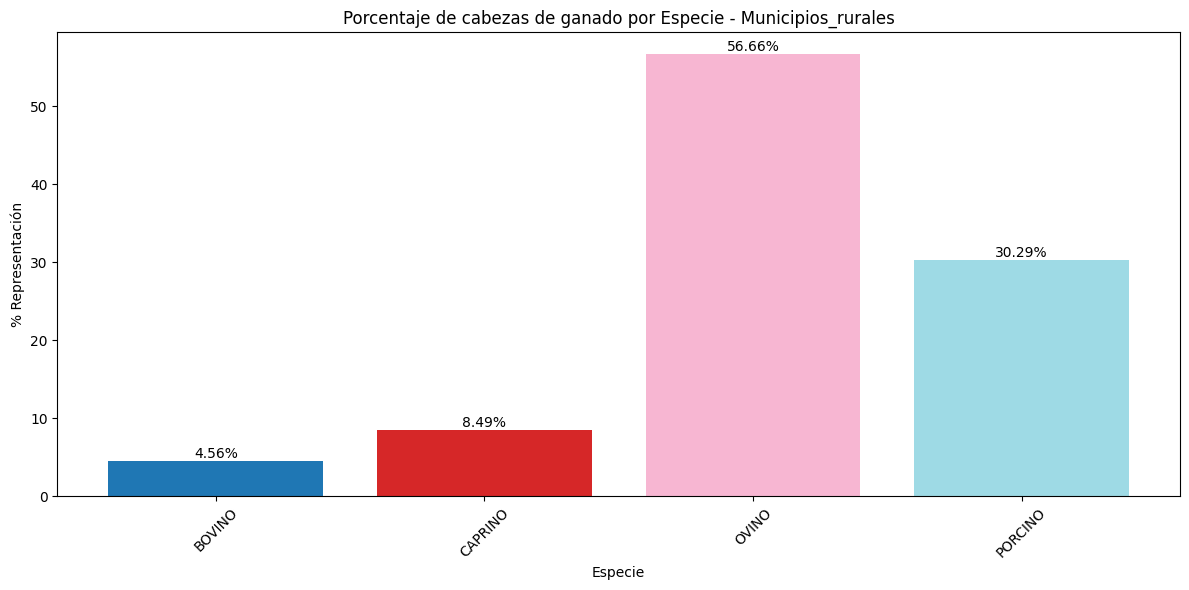

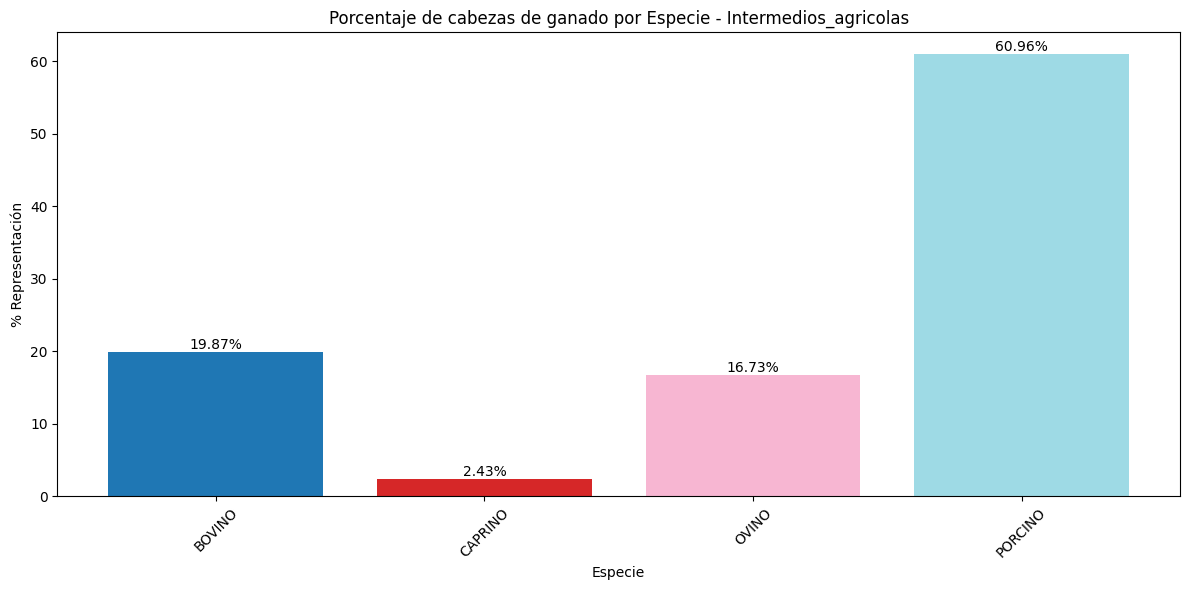

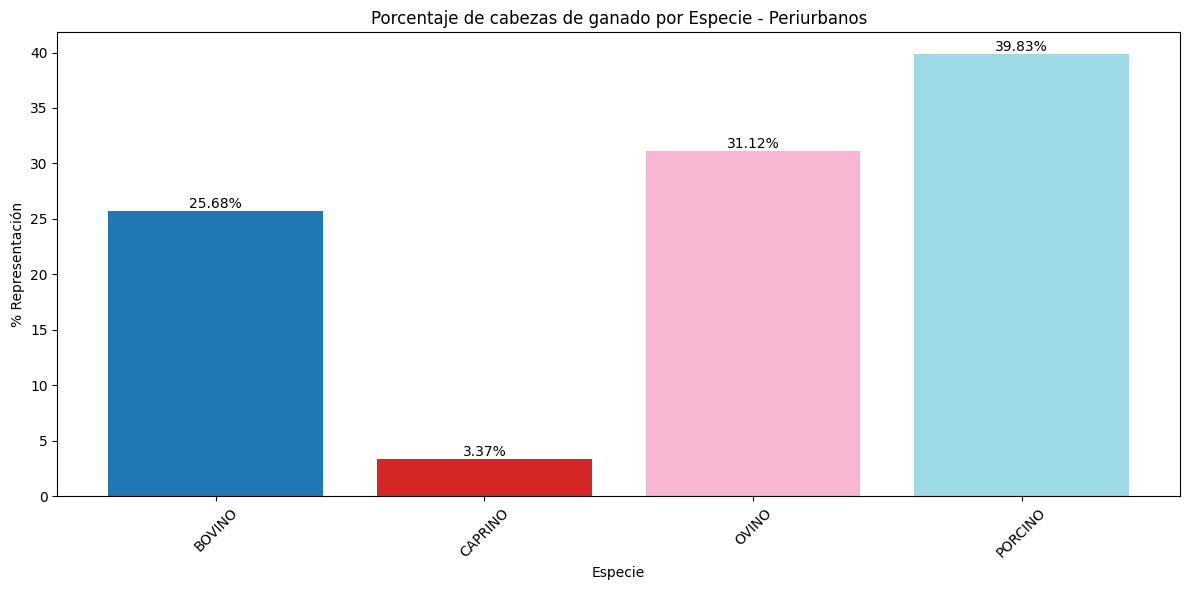

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Filtrar los grupos 
grupos_relevantes = ['Municipios_rurales', 'Intermedios_agricolas', 'Periurbanos']

# Crear gráficos para cada grupo
for grupo in grupos_relevantes:
    # Filtrar el datafraem por el grupo actual
    df_grupo = df[df['Grupo_clasificado'] == grupo]
    
    # Excluir tres categorías
    Excluir = ['GALLINAS', 'PAVOS', 'EQUINO']
    df_grupo = df_grupo[~df_grupo['ESPECIE'].isin(Excluir)]
    
    # Calcular el porcentaje del total por especie
    total_censo = df_grupo['CENSO'].sum()
    estadisticos_categoria = df_grupo.groupby(['ESPECIE'])['CENSO'].sum().reset_index()
    estadisticos_categoria['% Representación'] = (estadisticos_categoria['CENSO'] / total_censo) * 100
    
    # Diferenciar colores para cada especie
    colores = plt.cm.tab20(np.linspace(0, 1, len(estadisticos_categoria)))
    
    # Crear el gráfico general
    plt.figure(figsize=(12, 6))
    bars = plt.bar(estadisticos_categoria['ESPECIE'], estadisticos_categoria['% Representación'], color=colores)
    
    # Añadir % en la barra
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10)
    
    # Diseño de gráfico
    plt.title(f'Porcentaje de cabezas de ganado por Especie - {grupo}')
    plt.xlabel('Especie')
    plt.ylabel('% Representación')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Media de cabezas de ganado por grupo de municipio

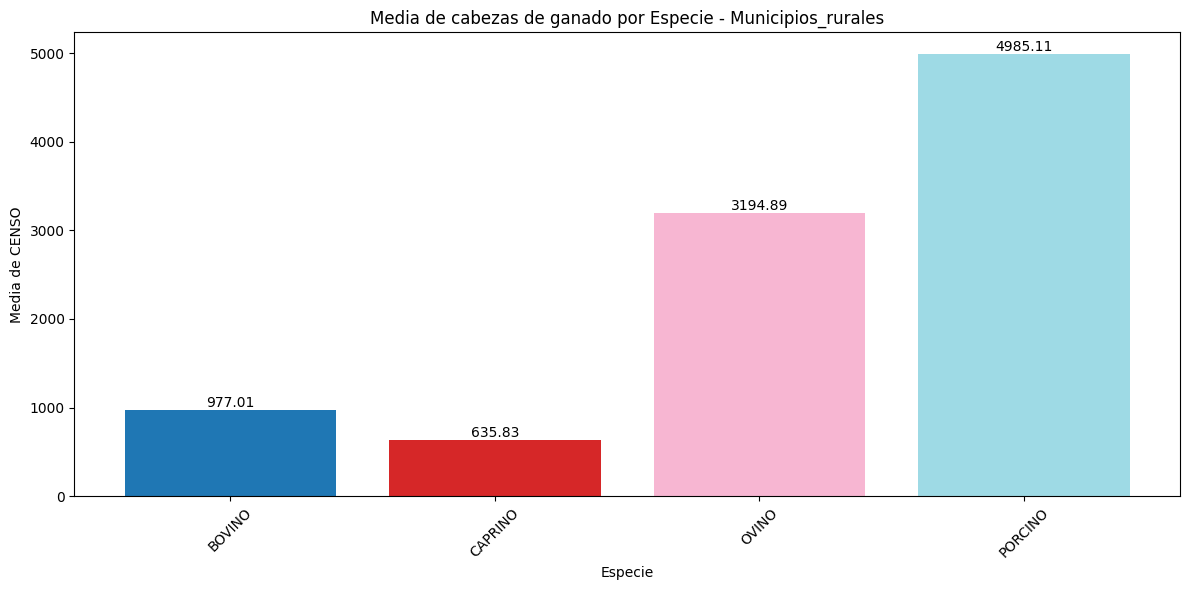

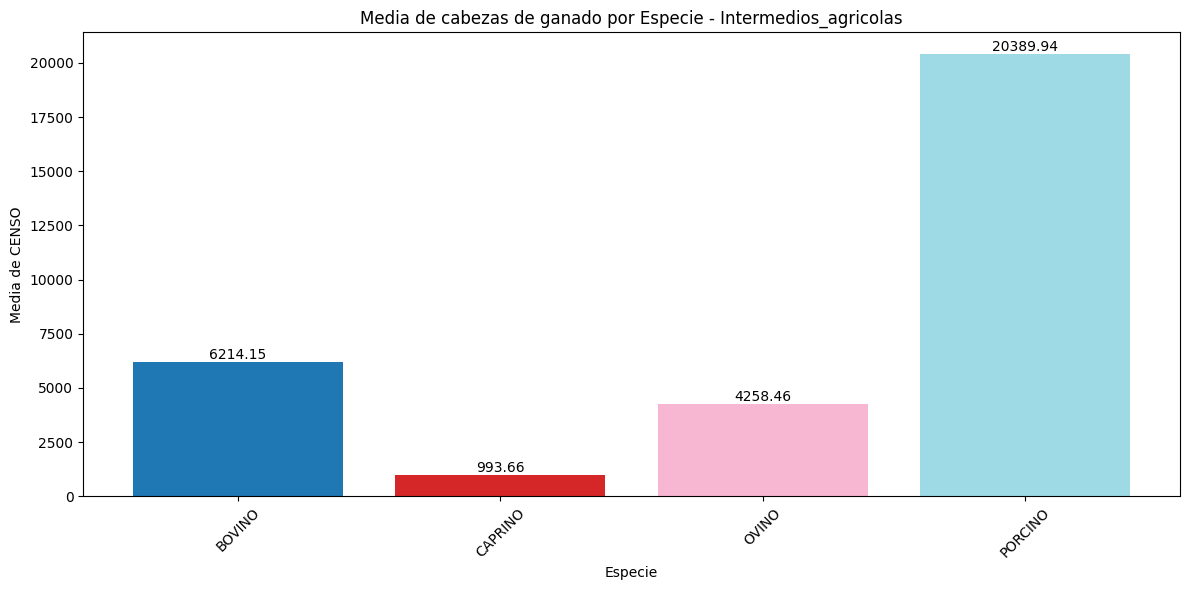

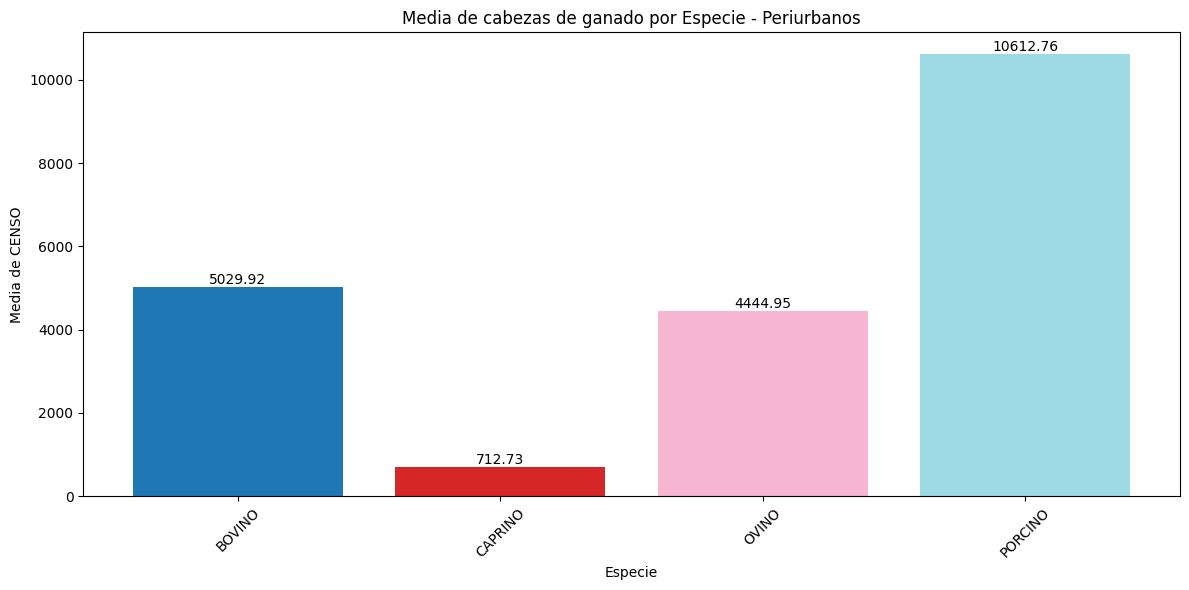

In [6]:
# Filtrar los grupos 
grupos_relevantes = ['Municipios_rurales', 'Intermedios_agricolas', 'Periurbanos']

# Crear gráficos para cada grupo
for grupo in grupos_relevantes:
    # Filtrar el dataframe por el grupo actual
    df_grupo = df[df['Grupo_clasificado'] == grupo]
    
    # Excluir tres categorías
    Excluir = ['GALLINAS', 'PAVOS', 'EQUINO']
    df_grupo = df_grupo[~df_grupo['ESPECIE'].isin(Excluir)]
    
    # Calcular estadísticos descriptivos por categoría dentro de cada especie
    estadisticos_categoria = df_grupo.groupby(['ESPECIE'])['CENSO'].agg(['mean']).reset_index()
    
    # Diferenciar colores para cada especie
    colores = plt.cm.tab20(np.linspace(0, 1, len(estadisticos_categoria)))
    
    # Crear el gráfico
    plt.figure(figsize=(12, 6))
    bars = plt.bar(estadisticos_categoria['ESPECIE'], estadisticos_categoria['mean'], color=colores)
    
    # Añadir mean encima de cada barra
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)
    
    # Diseño de gráfico
    plt.title(f'Media de cabezas de ganado por Especie - {grupo}')
    plt.xlabel('Especie')
    plt.ylabel('Media de CENSO')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Evolución del censo de cabezas de ganado

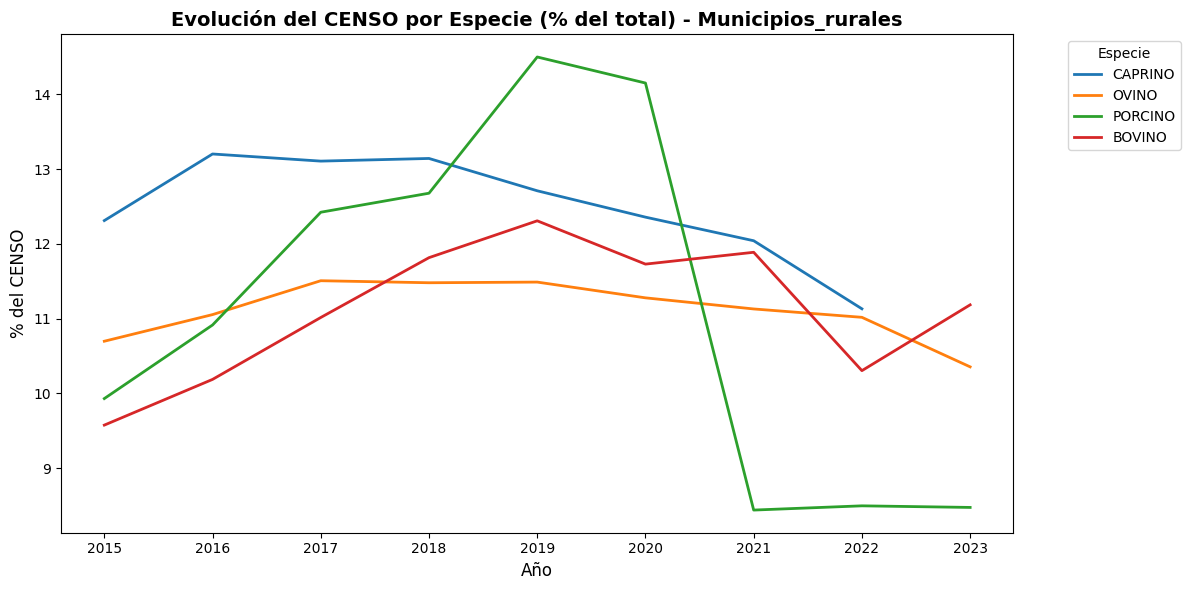

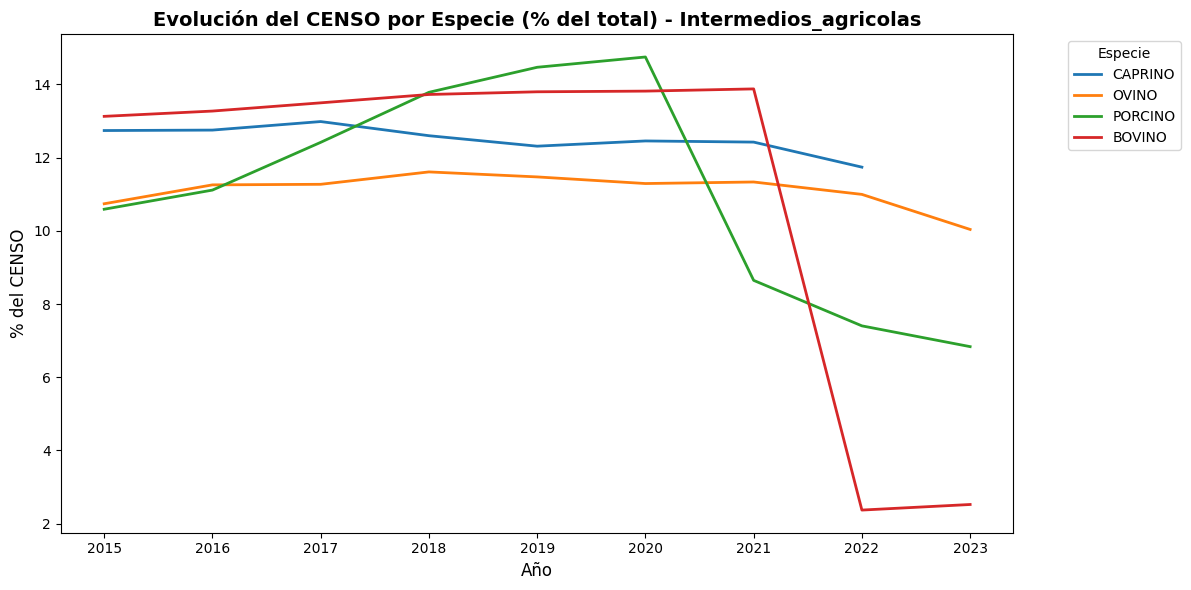

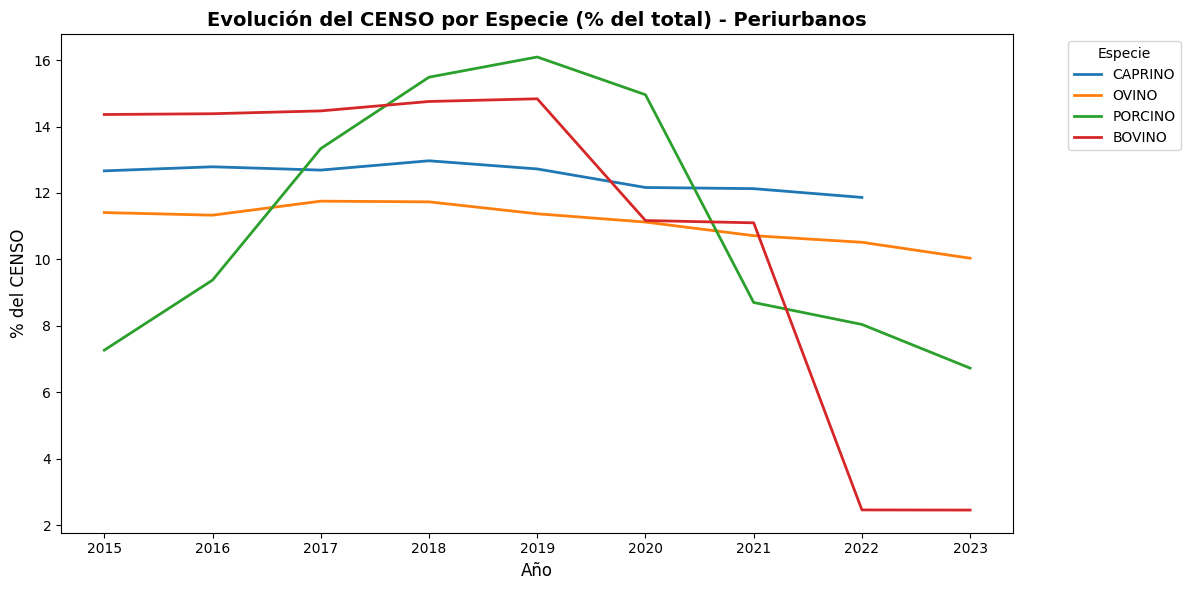

In [7]:
# Crear gráficos para cada grupo
for grupo in grupos_relevantes:
    # Filtrar el dataframe por el grupo actual
    df_grupo = df[df['Grupo_clasificado'] == grupo]
    
    # Excluir tres categorías
    Excluir = ['GALLINAS', 'PAVOS', 'EQUINO']
    df_grupo = df_grupo[~df_grupo['ESPECIE'].isin(Excluir)]
    
    # Obtener las especies únicas
    especies_unicas = df_grupo['ESPECIE'].unique()
    
    # Crear el gráfico
    plt.figure(figsize=(12, 6))
    
    # Grafiacr la evolución
    for especie in especies_unicas:
        # Filtrar el dataframe por la especie actual
        df_especie = df_grupo[df_grupo['ESPECIE'] == especie]
        
        # Agrupar por año y sumar las cabezas de ganado
        evolucion_censo = df_especie.groupby('Year')['CENSO'].sum().reset_index()
        
        # Calcular el porcentaje del CENSO para cada año
        evolucion_censo['% CENSO'] = (evolucion_censo['CENSO'] / evolucion_censo['CENSO'].sum()) * 100
        
        # Graficar la evolución expresada en %
        plt.plot(evolucion_censo['Year'], evolucion_censo['% CENSO'], label=especie, linewidth=2)
    
    # Diseño de gráfico
    plt.title(f'Evolución del CENSO por Especie (% del total) - {grupo}', fontsize=14, fontweight='bold')
    plt.xlabel('Año', fontsize=12)
    plt.ylabel('% del CENSO', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Especie', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.grid(False)  
    plt.tight_layout()
    plt.show()

### Evolución de emisiones de CH4

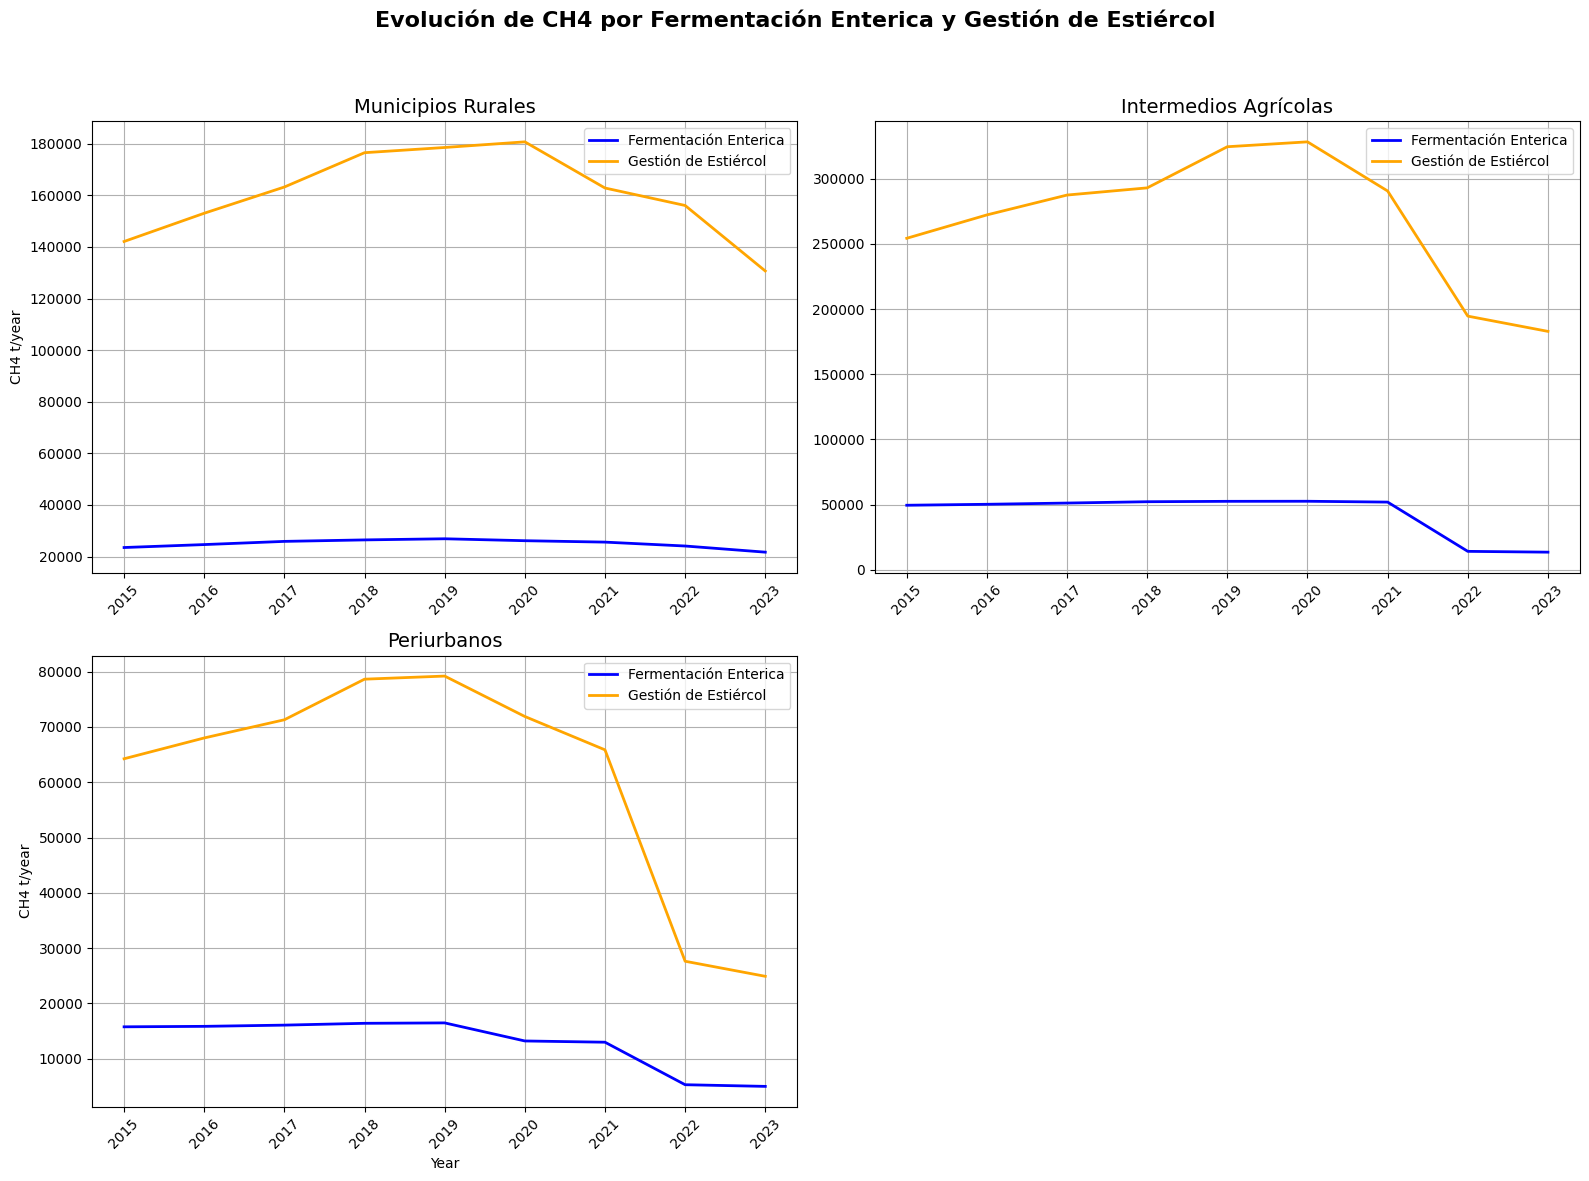

In [15]:
import matplotlib.pyplot as plt

# Asegurar tipo entero para los años
df['Year'] = df['Year'].astype(int)
years = sorted(df['Year'].unique())

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Evolución de CH4 por Fermentación Enterica y Gestión de Estiércol', fontsize=16, fontweight='bold')

# ---- MUNICIPIOS RURALES ----
ax1 = axes[0, 0]
df_rural = df[df['Grupo_clasificado'] == 'Municipios_rurales'].groupby('Year')[['Fermentacion_enterica', 'Gestion_estiercol']].sum().reset_index()
ax1.plot(df_rural['Year'], df_rural['Fermentacion_enterica'], label='Fermentación Enterica', color='blue', linewidth=2)
ax1.plot(df_rural['Year'], df_rural['Gestion_estiercol'], label='Gestión de Estiércol', color='orange', linewidth=2)
ax1.set_title('Municipios Rurales', fontsize=14)
ax1.set_ylabel('CH4 t/year')
ax1.set_xticks(years)
ax1.set_xticklabels(years, rotation=45)
ax1.grid(True)
ax1.legend(fontsize=10)

# ---- INTERMEDIOS AGRÍCOLAS ----
ax2 = axes[0, 1]
df_intermedios = df[df['Grupo_clasificado'] == 'Intermedios_agricolas'].groupby('Year')[['Fermentacion_enterica', 'Gestion_estiercol']].sum().reset_index()
ax2.plot(df_intermedios['Year'], df_intermedios['Fermentacion_enterica'], label='Fermentación Enterica', color='blue', linewidth=2)
ax2.plot(df_intermedios['Year'], df_intermedios['Gestion_estiercol'], label='Gestión de Estiércol', color='orange', linewidth=2)
ax2.set_title('Intermedios Agrícolas', fontsize=14)
ax2.set_xticks(years)
ax2.set_xticklabels(years, rotation=45)
ax2.grid(True)
ax2.legend(fontsize=10)

# ---- PERIURBANOS ----
ax3 = axes[1, 0]
df_periurbanos = df[df['Grupo_clasificado'] == 'Periurbanos'].groupby('Year')[['Fermentacion_enterica', 'Gestion_estiercol']].sum().reset_index()
ax3.plot(df_periurbanos['Year'], df_periurbanos['Fermentacion_enterica'], label='Fermentación Enterica', color='blue', linewidth=2)
ax3.plot(df_periurbanos['Year'], df_periurbanos['Gestion_estiercol'], label='Gestión de Estiércol', color='orange', linewidth=2)
ax3.set_title('Periurbanos', fontsize=14)
ax3.set_ylabel('CH4 t/year')
ax3.set_xlabel('Year')
ax3.set_xticks(years)
ax3.set_xticklabels(years, rotation=45)
ax3.grid(True)
ax3.legend(fontsize=10)

# ---- ELIMINAR CUARTO GRÁFICO ----
fig.delaxes(axes[1, 1])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Evolucion de emisiones de NO2

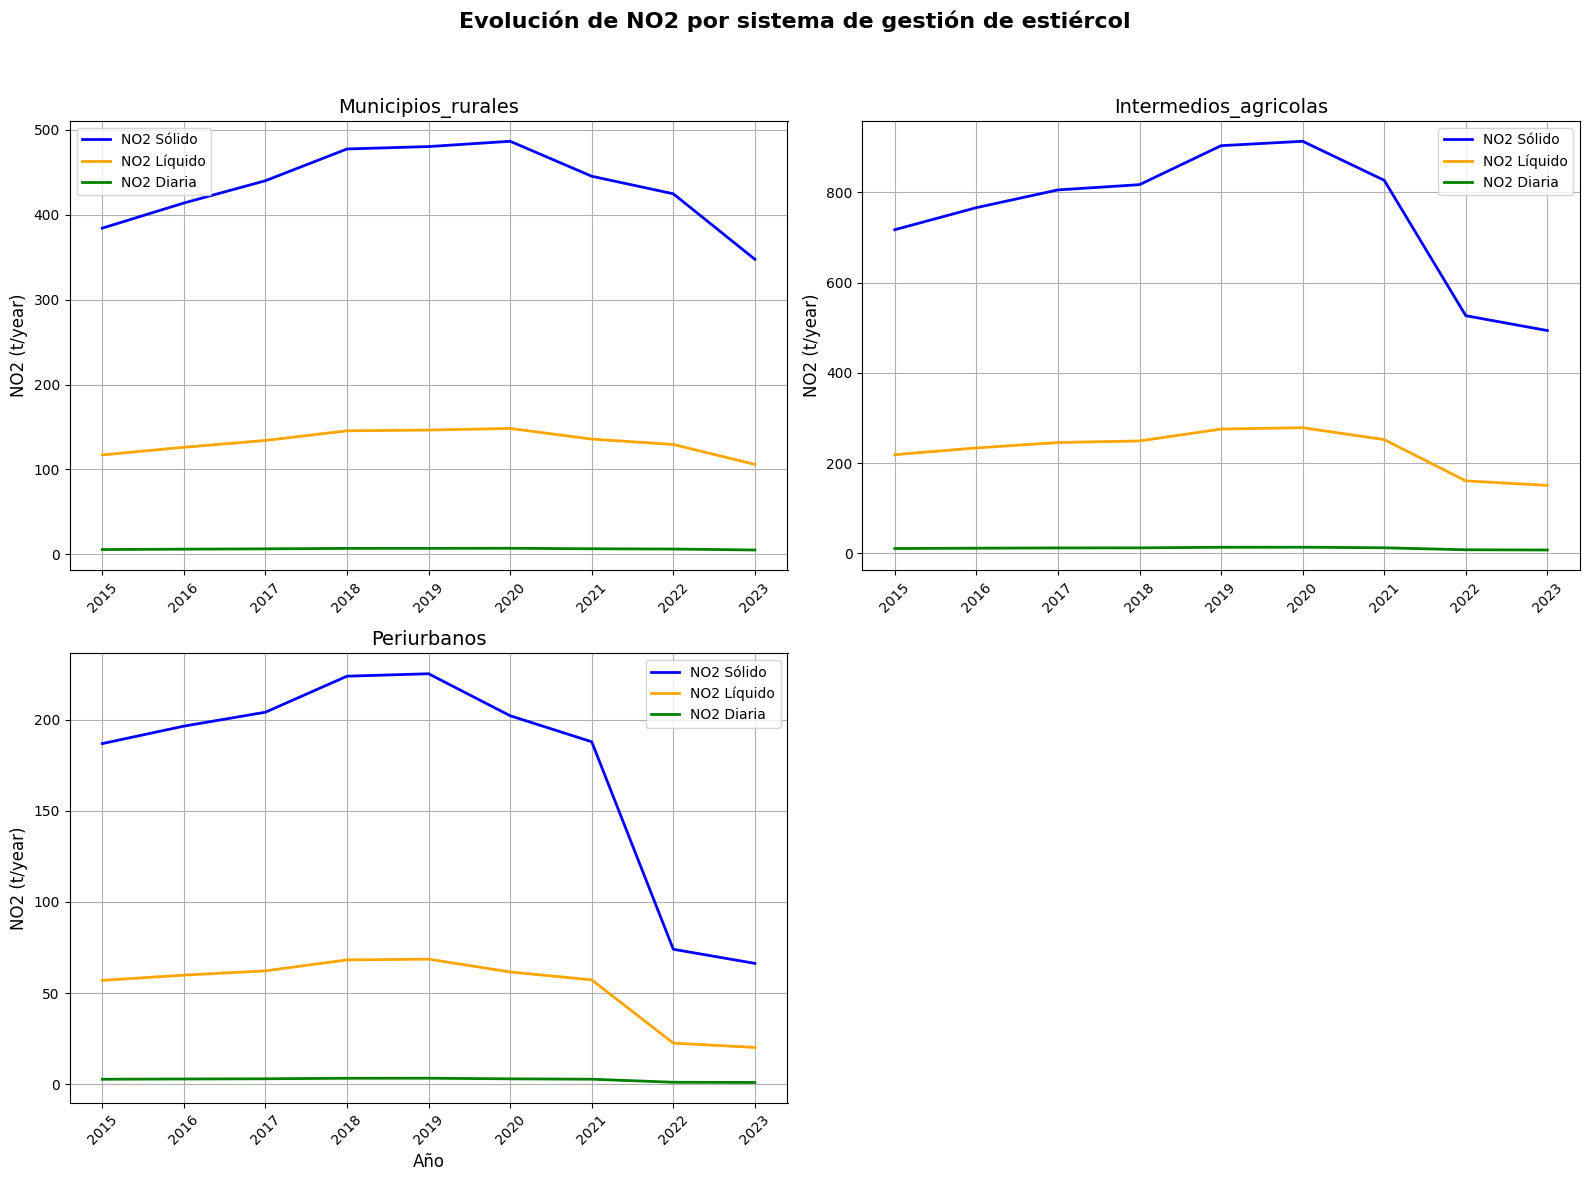

In [18]:
import matplotlib.pyplot as plt

# Asegurar años enteros y ordenados
df['Year'] = df['Year'].astype(int)
years = sorted(df['Year'].unique())

# Crear figura y 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2 columnas
fig.suptitle('Evolución de NO2 por sistema de gestión de estiércol', fontsize=16, fontweight='bold')

# Mapear subplots disponibles
subplot_positions = [(0, 0), (0, 1), (1, 0)]

# Dibujar los 3 grupos
for i, grupo in enumerate(grupos_relevantes):
    row, col = subplot_positions[i]
    ax = axes[row, col]
    
    df_grupo = df[df['Grupo_clasificado'] == grupo]
    evolucion_no2 = df_grupo.groupby('Year')[['NO2_Solido', 'NO2_Liquido', 'NO2_Diaria']].sum().reset_index()

    ax.plot(evolucion_no2['Year'], evolucion_no2['NO2_Solido'], label='NO2 Sólido', color='blue', linewidth=2)
    ax.plot(evolucion_no2['Year'], evolucion_no2['NO2_Liquido'], label='NO2 Líquido', color='orange', linewidth=2)
    ax.plot(evolucion_no2['Year'], evolucion_no2['NO2_Diaria'], label='NO2 Diaria', color='green', linewidth=2)

    ax.set_title(grupo, fontsize=14)
    ax.set_ylabel('NO2 (t/year)', fontsize=12)
    ax.set_xticks(years)
    ax.set_xticklabels(years, rotation=45)
    ax.grid(True)
    ax.legend(fontsize=10)

# Añadir etiqueta X al subplot de abajo
axes[1, 0].set_xlabel('Año', fontsize=12)

# Eliminar el subplot vacío (2,2)
fig.delaxes(axes[1, 1])

# Ajuste final
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Evolución de emisiones de CH4 por especie de ganado

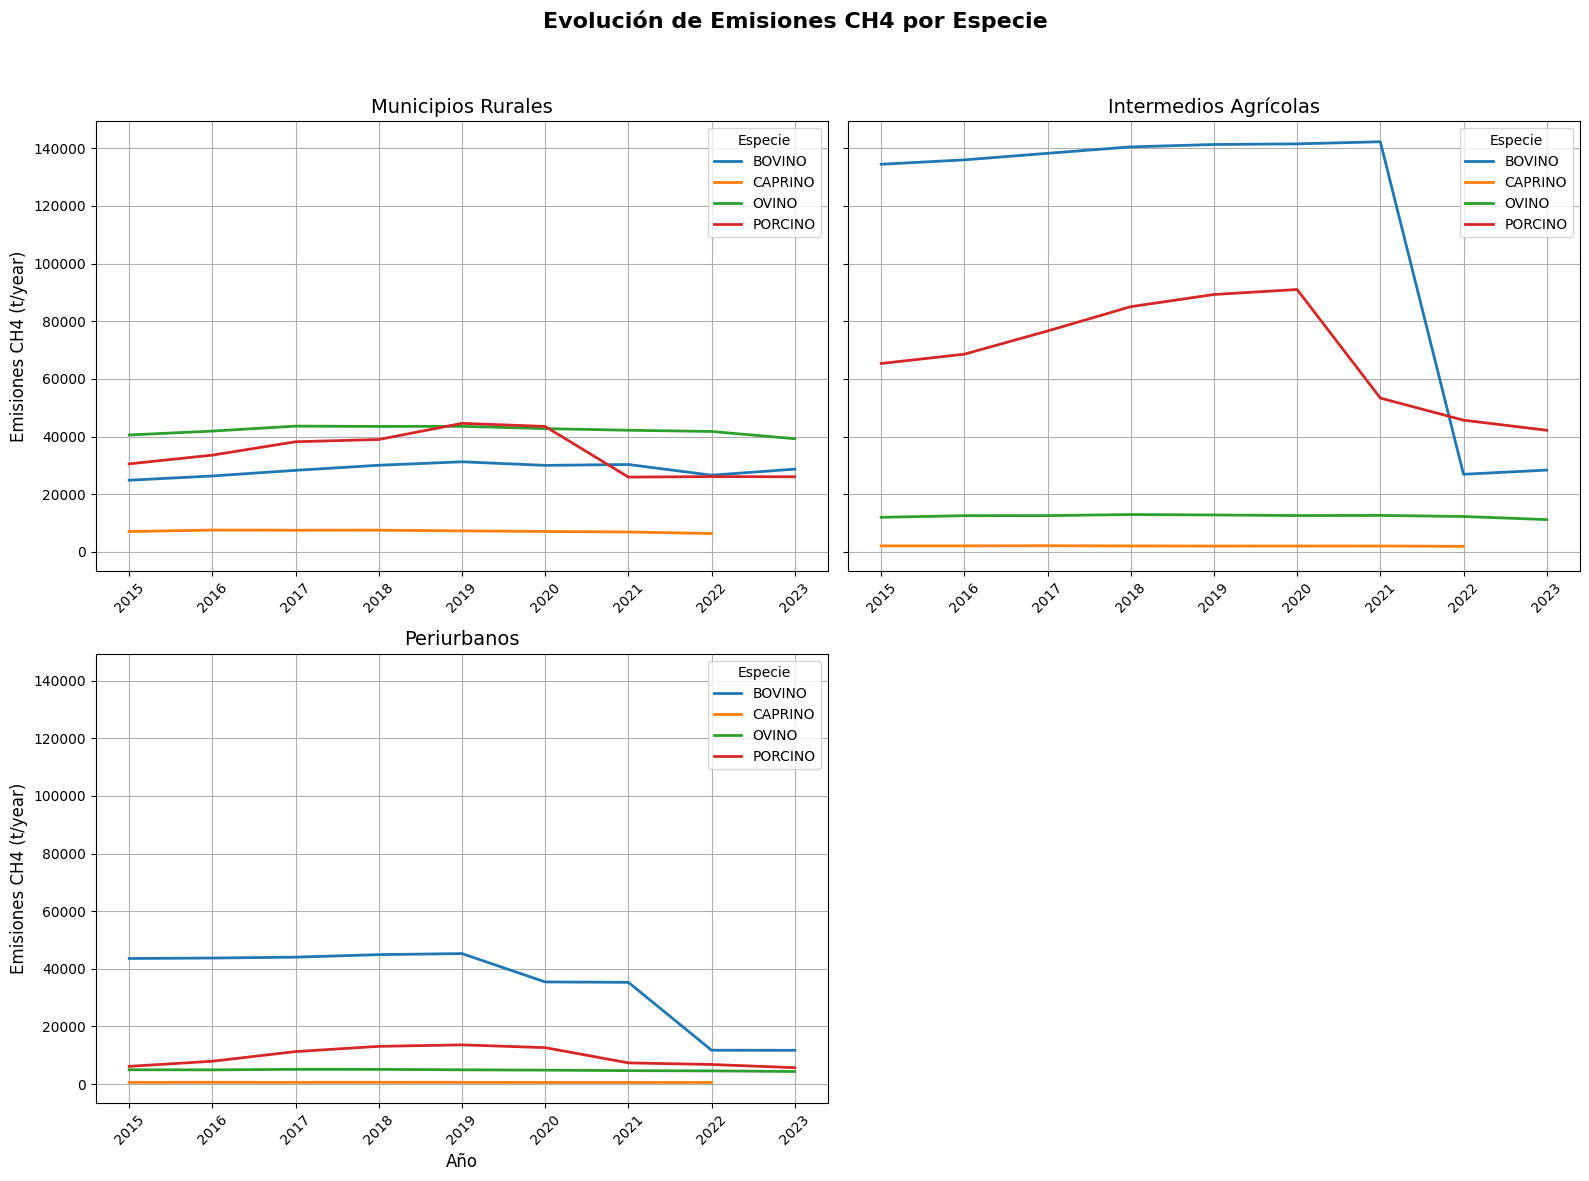

In [88]:
#Gráfico general
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharex=False, sharey=True)
fig.suptitle('Evolución de Emisiones CH4 por Especie', fontsize=16, fontweight='bold')

# Subgráfico: Municipios Rurales
ax1 = axes[0, 0]
df_rural = df[df['Grupo_clasificado'] == 'Municipios_rurales']
df_rural = df_rural[~df_rural['ESPECIE'].isin(Excluir)]
df_rural['Emisiones_CH4'] = df_rural['Fermentacion_enterica'] + df_rural['Gestion_estiercol']
evolucion_rural = df_rural.groupby(['Year', 'ESPECIE'])['Emisiones_CH4'].sum().reset_index()

#bucle para graficar cada especie
for especie in evolucion_rural['ESPECIE'].unique():
    df_especie = evolucion_rural[evolucion_rural['ESPECIE'] == especie]
    ax1.plot(df_especie['Year'], df_especie['Emisiones_CH4'], label=especie, linewidth=2)

#Diseño
ax1.set_title('Municipios Rurales', fontsize=14)
ax1.set_ylabel('Emisiones CH4 (t/year)', fontsize=12)
ax1.legend(title='Especie', fontsize=10)
ax1.grid(True)
ax1.set_xticks(evolucion_rural['Year'].unique())
ax1.set_xticklabels(evolucion_rural['Year'].unique(), rotation=45)

# Subgráfico: Intermedios Agrícolas
ax2 = axes[0, 1]
df_intermedios = df[df['Grupo_clasificado'] == 'Intermedios_agricolas']
df_intermedios = df_intermedios[~df_intermedios['ESPECIE'].isin(Excluir)]
df_intermedios['Emisiones_CH4'] = df_intermedios['Fermentacion_enterica'] + df_intermedios['Gestion_estiercol']
evolucion_intermedios = df_intermedios.groupby(['Year', 'ESPECIE'])['Emisiones_CH4'].sum().reset_index()

#bucle para graficar cada especie
for especie in evolucion_intermedios['ESPECIE'].unique():
    df_especie = evolucion_intermedios[evolucion_intermedios['ESPECIE'] == especie]
    ax2.plot(df_especie['Year'], df_especie['Emisiones_CH4'], label=especie, linewidth=2)

# diseño
ax2.set_title('Intermedios Agrícolas', fontsize=14)
ax2.legend(title='Especie', fontsize=10)
ax2.grid(True)
ax2.set_xticks(evolucion_intermedios['Year'].unique())
ax2.set_xticklabels(evolucion_intermedios['Year'].unique(), rotation=45)

# Subgráfico: Periurbanos
ax3 = axes[1, 0]
df_periurbanos = df[df['Grupo_clasificado'] == 'Periurbanos']
df_periurbanos = df_periurbanos[~df_periurbanos['ESPECIE'].isin(Excluir)]
df_periurbanos['Emisiones_CH4'] = df_periurbanos['Fermentacion_enterica'] + df_periurbanos['Gestion_estiercol']
evolucion_periurbanos = df_periurbanos.groupby(['Year', 'ESPECIE'])['Emisiones_CH4'].sum().reset_index()

#Bucle para graficar cada especie
for especie in evolucion_periurbanos['ESPECIE'].unique():
    df_especie = evolucion_periurbanos[evolucion_periurbanos['ESPECIE'] == especie]
    ax3.plot(df_especie['Year'], df_especie['Emisiones_CH4'], label=especie, linewidth=2)

#Diseño
ax3.set_title('Periurbanos', fontsize=14)
ax3.set_xlabel('Año', fontsize=12)
ax3.set_ylabel('Emisiones CH4 (t/year)', fontsize=12)
ax3.legend(title='Especie', fontsize=10)
ax3.grid(True)
ax3.set_xticks(evolucion_periurbanos['Year'].unique())
ax3.set_xticklabels(evolucion_periurbanos['Year'].unique(), rotation=45)

# Eliminar el cuarto subgráfico para evitar una suerposición (parte inferior derecha)
fig.delaxes(axes[1, 1])
 
# Diseño
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()


## Descargar archvo para visualizarlo de manera espacial

## Crear un solo dataframe con el total de emisiones por Id

In [89]:
# Calcular la suma de CH4 y NO2 por Id
emisiones_totales = df.groupby('Id').agg({
    'Fermentacion_enterica': 'sum',
    'Gestion_estiercol': 'sum',
    'NO2_Solido': 'sum',
    'NO2_Liquido': 'sum',
    'NO2_Diaria': 'sum'
}).reset_index()

# Crear las columnas CH4 y NO2
emisiones_totales['CH4'] = emisiones_totales['Fermentacion_enterica'] + emisiones_totales['Gestion_estiercol']
emisiones_totales['NO2'] = emisiones_totales['NO2_Solido'] + emisiones_totales['NO2_Liquido'] + emisiones_totales['NO2_Diaria']

# Seleccionar las columnas relevantes
emisiones_totales = emisiones_totales[['Id', 'CH4', 'NO2']]

# Descargar el dataframe como archivo .xlsx
emisiones_totales.to_excel('emisiones_totales.xlsx', index=False)

# Verificar
print(emisiones_totales.head())

      Id           CH4         NO2
0  02001   4067.079862   13.774520
1  02002    674.147400    2.001560
2  02003  39319.177383  104.907015
3  02004    851.914780    2.658603
4  02005   4086.983959   13.852482


### Cargar dataset de empleo y función para convertir en panel

In [90]:
Empleo_df = pd.read_excel('Mapa.xlsx', sheet_name='Empleo', dtype={'Id': str})

# Asegurar que las columnas de años sean str
Empleo_df.columns = Empleo_df.columns.astype(str)

# Función para convertir en un panel de datos
def convert_to_panel(df, id_column, year_start, year_end, value_name='Value'):
   
    # Convertir a panel
    panel = df.melt(id_vars=[id_column],
                    value_vars=[str(year) for year in range(year_start, year_end + 1)],
                    var_name='Year',
                    value_name=value_name)
    return panel

# Aplicar función a Empleo_df
Empleo_panel = convert_to_panel(Empleo_df, id_column='Id', year_start=2015, year_end=2022, value_name='Empleo')

# Verificar 
print(Empleo_panel.head())

      Id  Year  Empleo
0  02001  2015    32.0
1  02002  2015    36.0
2  02003  2015  2375.0
3  02004  2015    53.0
4  02005  2015    38.0


### Cargar dataset de población y aplicar función para convertir en panel

In [91]:
Pob_df = pd.read_excel('Mapa.xlsx', sheet_name='Pob', dtype={'Id': str})
Pob_df = convert_to_panel(Pob_df, id_column='Id', year_start=2015, year_end=2022, value_name='Poblacion')
print(Pob_df.head())

      Id  Year  Poblacion
0  02001  2015        782
1  02002  2015        610
2  02003  2015     172121
3  02004  2015        744
4  02005  2015        754


### Cargar dataset de empresas y bucle para cargar cada hoja de excel

In [92]:
import pandas as pd
ruta_archivo = 'Copia de Empresas.xlsx'

# Leer todas las hojas en un diccionario 
hojas = pd.ExcelFile(ruta_archivo).sheet_names
dataframes = {}

for hoja in hojas:
    dataframes[hoja] = pd.read_excel(ruta_archivo, sheet_name= hoja)

# List comprenhension
# dataframes = {f"df_{hoja}": pd.read_excel(ruta_archivo, sheet_name=hoja) for hoja in hojas}

# Verificar
for hoja in hojas:
    print(f"Hoja: {hoja}")

Hoja: 2023
Hoja: 2022
Hoja: 2021
Hoja: 2020
Hoja: 2019
Hoja: 2018
Hoja: 2017
Hoja: 2016
Hoja: 2015


## Función para extraer solamente los números de la columna Muncipio y crear variable Id

In [93]:
import re

# Crear una función para extraer números de una cadena
def extract_numbers(cadena):
    return ''.join(re.findall(r'\d+', str(cadena)))

# Bucle para procesarlo en todos los dataframes
for hoja in hojas:
    # Obtener el df correspondiente desde el diccionario dataframes creado previamente
    df_empresas = dataframes[hoja]
    
    # Crear la columna Id solamente con los números de Municipio
    ids = []
    for municipio in df_empresas['Municipio']:
        ids.append(extract_numbers(municipio))
    df_empresas['Id'] = ids
    
    # Eliminar la columna Municipio
    df_empresas.drop(columns=['Municipio'], inplace=True)
    
    # Guardar el resultado en el diccionario
    dataframes[hoja] = df_empresas

# Verificar
print(dataframes['2015'].head())

   Empresas     Id
0         6  02001
1         1  02001
2         1  02001
3         1  02002
4         1  02002


### Crear panel de datos para empresas

In [ ]:
# Diccionario para relacionar el año con la columna de empresas
columnas_por_years = {
    2015: 'Empresas',
    2016: 'TOTAL',
    2017: 'TOTAL',
    2018: 'TOTAL',
    2019: 'TOTAL',
    2020: 'Total20',
    2021: 'Total21',
    2022: 'Total22',
    2023: 'Total23'
}

# Crear una lista para almacenar los dataframes procesados
panel_data = []

for year in range(2015, 2024):
    # Obtener el dataframe correspondiente al año que sea string
    df_empresas = dataframes[str(year)]
    
    # Obtener el nombre de la columna correspondiente al año
    columna = columnas_por_years[year]
    
    # Añadir la columna Year al dataframe
    df_empresas['Year'] = year
    
    # Seleccionar las columnas necesarias
    df_empresas = df_empresas[['Id', 'Year', columna]]
    df_empresas.rename(columns={columna: 'Empresas'}, inplace=True)
    
    # Añadir el resultado del df a la lista
    panel_data.append(df_empresas)

# Unir todos los dataframes en uno solo
panel_datos = pd.concat(panel_data, ignore_index=True)

# Verificar 
print(panel_datos.head())

# Guardar el panel de datos en un archivo .xlsx
panel_datos.to_excel('panel_empresas.xlsx', index=False)


      Id  Year  Empresas
0  02001  2015         6
1  02001  2015         1
2  02001  2015         1
3  02002  2015         1
4  02002  2015         1


## Agrupar empresas por Id y Year

In [95]:
Empresas = pd.read_excel('panel_empresas.xlsx', dtype = {'Id': str})
# Agrupar por Id y Year y sumar la columna Empresas
Empresas = Empresas.groupby(['Id', 'Year'])['Empresas'].sum().reset_index()

# Verificar 
print(len(Empresas))
print(Empresas.head())

7857
      Id  Year  Empresas
0  02001  2015         8
1  02001  2016         8
2  02001  2017         8
3  02001  2018         9
4  02001  2019         9


## Crear el dataframe final

In [96]:
# Crear el nuevo DataFrame agrupado por Id y Year
df_final = df.groupby(['Id', 'Year', 'Grupo']).agg({
    'Fermentacion_enterica': 'sum',
    'Gestion_estiercol': 'sum',
    'NO2_Solido': 'sum',
    'NO2_Liquido': 'sum',
    'NO2_Diaria': 'sum'
}).reset_index()

# Crear las nuevas columnas CH4 y NO2
df_final['CH4'] = df_final['Fermentacion_enterica'] + df_final['Gestion_estiercol']
df_final['NO2'] = df_final['NO2_Solido'] + df_final['NO2_Liquido'] + df_final['NO2_Diaria']

# Seleccionar las columnas finales
df_final = df_final[['Id', 'Year', 'CH4', 'NO2','Grupo']]

# Verificar 
print(len(df_final))
print(df_final.head())

7180
      Id  Year         CH4       NO2  Grupo
0  02001  2015  504.947265  1.682756      2
1  02001  2016  489.671135  1.650356      2
2  02001  2017  475.751992  1.584107      2
3  02001  2018  417.286889  1.400011      2
4  02001  2019  463.847886  1.547461      2


## unir panel de datos empleo, emepresas, poblacion y final

In [97]:
def join_panel_datos(df_principal, df_poblacion, df_empleo, df_empresas):
    """
    Une varios DataFrames por las columnas Id y Year.
    """
    # Las columnas Id y Year deben ser del tipo adecuado y el mismo en todos los df
    dataframes = [df_principal, df_poblacion, df_empleo, df_empresas]
    d_types = {'Id': str, 'Year': int}
    
    for df in dataframes:
        for column, dtype in d_types.items():
            df[column] = df[column].astype(dtype)

    # Realizar la unión con el df principal
    df_combinado = df_principal.merge(df_poblacion, on=['Id', 'Year'], how='inner')

    # Realizar la unión con empleo
    df_combinado = df_combinado.merge(df_empleo, on=['Id', 'Year'], how='inner')

    # Realizar la unión con empresas
    df_combinado = df_combinado.merge(df_empresas, on=['Id', 'Year'], how='inner')

    return df_combinado

# Ejemplo de uso de la función
df_combinado = join_panel_datos(df_final, Pob_df, Empleo_panel, Empresas)

# Verificar 
print(len(df_combinado))  
print(df_combinado.head())

6284
      Id  Year         CH4       NO2  Grupo  Poblacion  Empleo  Empresas
0  02001  2015  504.947265  1.682756      2        782    32.0         8
1  02001  2016  489.671135  1.650356      2        761    32.0         8
2  02001  2017  475.751992  1.584107      2        748    33.0         8
3  02001  2018  417.286889  1.400011      2        757    31.0         9
4  02001  2019  463.847886  1.547461      2        790    31.0         9


### Transformar variables a logaritmos neperianos

In [98]:
# Crear un dataframe con logaritmos
df_filtrado_log = df_combinado.copy()

# Aplicar logaritmo neperiano a las columnas 
df_filtrado_log['CH4'] = np.log(df_filtrado_log['CH4'])
df_filtrado_log['NO2'] = np.log(df_filtrado_log['NO2'])
df_filtrado_log['Poblacion'] = np.log(df_filtrado_log['Poblacion'])
df_filtrado_log['Empleo'] = np.log(df_filtrado_log['Empleo'])
df_filtrado_log['Empresas'] = np.log(df_filtrado_log['Empresas'])

# Verificar 
print(df_filtrado_log.head())

      Id  Year       CH4       NO2  Grupo  Poblacion    Empleo  Empresas
0  02001  2015  6.224454  0.520433      2   6.661855  3.465736  2.079442
1  02001  2016  6.193734  0.500991      2   6.634633  3.465736  2.079442
2  02001  2017  6.164897  0.460021      2   6.617403  3.496508  2.079442
3  02001  2018  6.033774  0.336480      2   6.629363  3.433987  2.197225
4  02001  2019  6.139557  0.436616      2   6.672033  3.433987  2.197225


/Users/germanandrescevallos/Desktop/Doctorado/Algoritmos/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Matiz de correlación

Matriz de correlación para los grupos 1, 2 y 3:
                CH4       NO2  Poblacion    Empleo  Empresas
CH4        1.000000  0.997680   0.537278  0.576344  0.513492
NO2        0.997680  1.000000   0.531819  0.571300  0.505092
Poblacion  0.537278  0.531819   1.000000  0.863053  0.802210
Empleo     0.576344  0.571300   0.863053  1.000000  0.848819
Empresas   0.513492  0.505092   0.802210  0.848819  1.000000


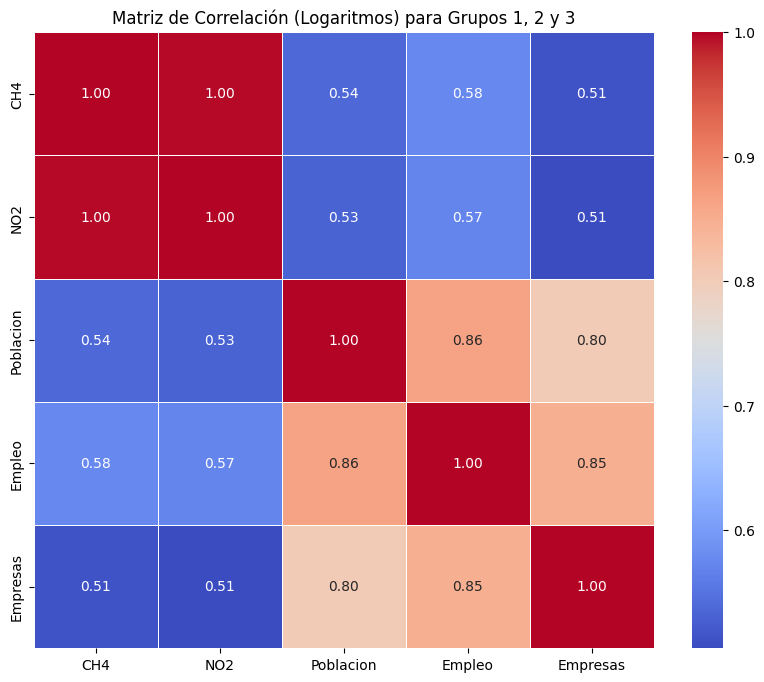

In [100]:
import seaborn as sns
# Filtrar los datos para los grupos 1, 2 y 3
df_filtrado_grupos = df_filtrado_log[df_filtrado_log['Grupo'].isin([1, 2, 3])]

# Excluir Id y Año
df_correlacion = df_filtrado_grupos.drop(columns=['Id', 'Year', 'Grupo'])

# Crear la matriz de correlación
matriz_correlacion = df_correlacion.corr()

print("Matriz de correlación para los grupos 1, 2 y 3:")
print(matriz_correlacion)

# Visualización
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación (Logaritmos) para Grupos 1, 2 y 3')
plt.show()

## Matriz de correlación variables en escala original

Matriz de correlación para los grupos 1, 2 y 3:
                CH4       NO2  Poblacion    Empleo  Empresas
CH4        1.000000  0.992161   0.285101  0.267450  0.342701
NO2        0.992161  1.000000   0.277920  0.267976  0.328368
Poblacion  0.285101  0.277920   1.000000  0.848760  0.758969
Empleo     0.267450  0.267976   0.848760  1.000000  0.708911
Empresas   0.342701  0.328368   0.758969  0.708911  1.000000


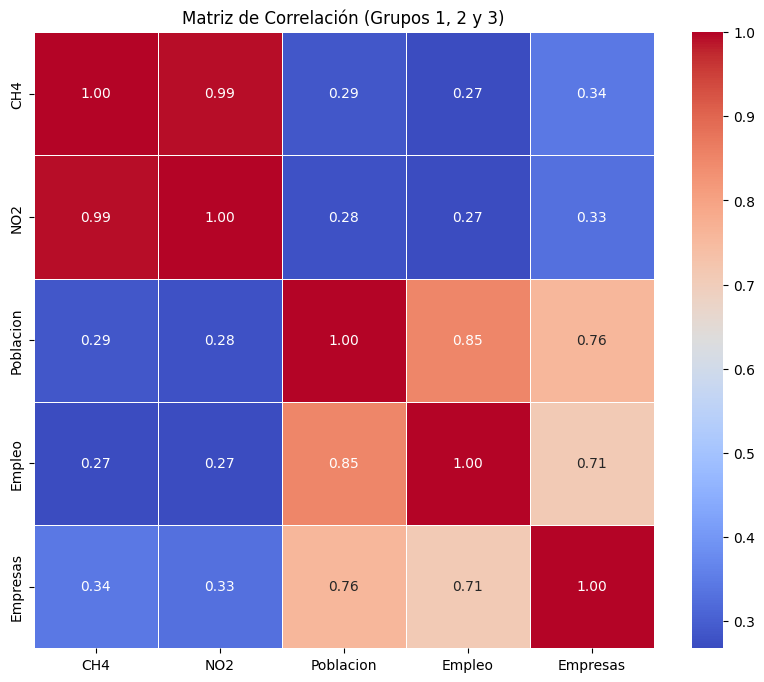

In [102]:
# Filtrar los datos para los grupos 1, 2 y 3
df_filtrado = df_combinado[df_combinado['Grupo'].isin([1, 2, 3])]

# Excluir Id y Año
df_correlacion = df_filtrado.drop(columns=['Id', 'Year', 'Grupo'])

# Crear la matriz de correlación
matriz_correlacion_filtrada = df_correlacion.corr()

print("Matriz de correlación para los grupos 1, 2 y 3:")
print(matriz_correlacion_filtrada)

# Visualización
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion_filtrada, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación (Grupos 1, 2 y 3)')
plt.show()

## Gráfico de dispersión Población y CH4

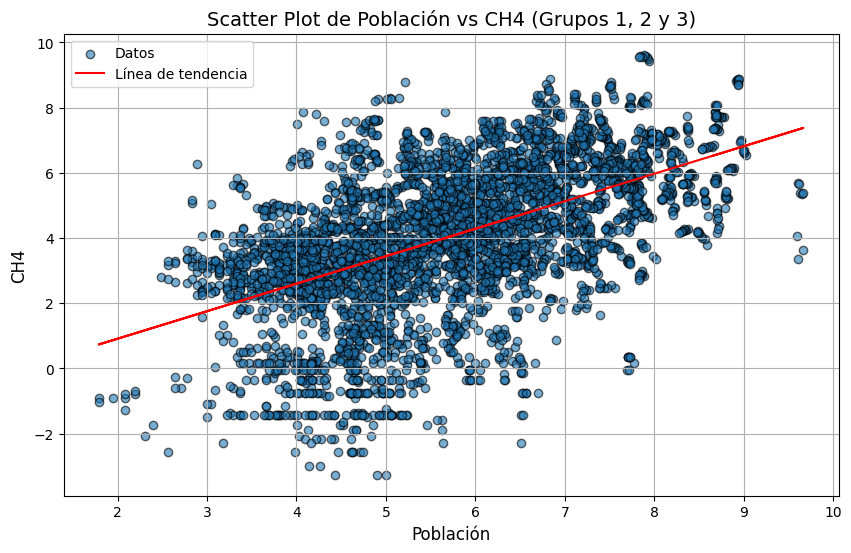

In [103]:
# Filtrar los datos para los grupos 1, 2 y 3
df_grupos_filtrados = df_filtrado_log[df_filtrado_log['Grupo'].isin([1,2,3])]

# Crear el sgráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_grupos_filtrados['Poblacion'], df_grupos_filtrados['CH4'], alpha=0.6, edgecolors='k', label='Datos')

# Añadir línea de tendencia
coef = np.polyfit(df_grupos_filtrados['Poblacion'], df_grupos_filtrados['CH4'], 1)
tendencia = np.poly1d(coef)

# Graficar la línea de tendencia
plt.plot(df_grupos_filtrados['Poblacion'], tendencia(df_grupos_filtrados['Poblacion']), color='red', label='Línea de tendencia')

# Diseño gráfico
plt.title('Scatter Plot de Población vs CH4 (Grupos 1, 2 y 3)', fontsize=14)
plt.xlabel('Población', fontsize=12)
plt.ylabel('CH4', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

## Causalidad de granger

In [105]:
from statsmodels.tsa.stattools import grangercausalitytests

# Seleccionar las columnas para la prueba
df_granger = df_filtrado_log[['Poblacion', 'CH4']]

# Especificar el número de lags (rezagos) que se desea utilizar. En este caso 2.
grangercausalitytests(df_granger, maxlag=2, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.2709  , p=0.0040  , df_denom=6280, df_num=1
ssr based chi2 test:   chi2=8.2749  , p=0.0040  , df=1
likelihood ratio test: chi2=8.2694  , p=0.0040  , df=1
parameter F test:         F=8.2709  , p=0.0040  , df_denom=6280, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.9614  , p=0.0070  , df_denom=6277, df_num=2
ssr based chi2 test:   chi2=9.9306  , p=0.0070  , df=2
likelihood ratio test: chi2=9.9228  , p=0.0070  , df=2
parameter F test:         F=4.9614  , p=0.0070  , df_denom=6277, df_num=2


/Users/germanandrescevallos/Desktop/Doctorado/Algoritmos/.venv/lib/python3.13/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{np.int64(1): ({'ssr_ftest': (np.float64(8.270915259471183),
    np.float64(0.004042076751624912),
    np.float64(6280.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(8.27486633363972),
    np.float64(0.004019762178334199),
    np.int64(1)),
   'lrtest': (np.float64(8.269422011549977),
    np.float64(0.004031833969597419),
    np.int64(1)),
   'params_ftest': (np.float64(8.270915259471275),
    np.float64(0.004042076751624912),
    np.float64(6280.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(4.961359522340179),
    np.float64(0.00703088862252703),
    np.float64(6277.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(9.93062307450725),
    np.float64(0.006975777156089286),
    np.int64(2)),
   'lrtest': (np.float64(9.92278214264843),
    np.float64(0.007003179131919744),
    np.int64(2)),
   'params_ftest': (np.float64(4.961359522339774),
    np.float64(0.00703088862252703),
    np.float64(6277.0),
    2.0)},
   array([[0., 0., 1., 0., 0.],